In [48]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
from random import randint

In [5]:
molecules = pd.read_csv("compound-annotation.csv", sep=",")
molecules = molecules[molecules["SMILES"].notna()]
molecules = molecules.drop_duplicates(subset=['SMILES'], ignore_index=True)
smiles = molecules[["SMILES"]]
smiles

,SMILES
0,CN(C)C(=O)CC1CC2(CCN(CC2)C(=O)N2CCCC2)Oc2ccccc12
1,Cc1c([nH]c2CC(CC(=O)c12)c1ccco1)C(=O)OCC1CCCO1
2,CNC(=O)CN1CCC11CCN(C1)C(=O)c1ccn(C)n1
3,Cn1cc(cn1)N1CCC2(CCN(C2)C(=O)c2ccncc2)C1=O
4,CC(C)CN1CC2CN(CC2C1)S(=O)(=O)c1ccccc1
...,...
47212,[Zn++].CCC(C)[C@H](N)C1=NCC(S1)C(=O)N[C@@H](CC...
47213,CCCNC(=O)[C@@H]1[C@@H](CO)[C@@H]2Cn3c(=O)c(ccc...
47214,C\C=C\c1ccc2[C@H]3N[C@H]([C@H](CO)[C@H]3Cn2c1=...
47215,CCN1[C@@H](C(=O)Nc2ccccc2)[C@H](CO)[C@H]2Cn3c(...


In [6]:
labels = pd.read_csv("labels.csv")
labels

,0
0,5
1,0
2,18
3,8
4,17
...,...
47212,9
47213,5
47214,3
47215,3


In [35]:
smiles_labels = pd.merge(labels, smiles, left_index=True, right_index=True)
Smiles_label = smiles_labels.rename(columns={"0" : "label"})
Smiles_label

,label,SMILES
0,5,CN(C)C(=O)CC1CC2(CCN(CC2)C(=O)N2CCCC2)Oc2ccccc12
1,0,Cc1c([nH]c2CC(CC(=O)c12)c1ccco1)C(=O)OCC1CCCO1
2,18,CNC(=O)CN1CCC11CCN(C1)C(=O)c1ccn(C)n1
3,8,Cn1cc(cn1)N1CCC2(CCN(C2)C(=O)c2ccncc2)C1=O
4,17,CC(C)CN1CC2CN(CC2C1)S(=O)(=O)c1ccccc1
...,...,...
47212,9,[Zn++].CCC(C)[C@H](N)C1=NCC(S1)C(=O)N[C@@H](CC...
47213,5,CCCNC(=O)[C@@H]1[C@@H](CO)[C@@H]2Cn3c(=O)c(ccc...
47214,3,C\C=C\c1ccc2[C@H]3N[C@H]([C@H](CO)[C@H]3Cn2c1=...
47215,3,CCN1[C@@H](C(=O)Nc2ccccc2)[C@H](CO)[C@H]2Cn3c(...


In [34]:
Smiles_label.groupby('label').apply(print)

       label                                             SMILES
1          0     Cc1c([nH]c2CC(CC(=O)c12)c1ccco1)C(=O)OCC1CCCO1
24         0             Cc1ccc(o1)C(=O)N1CCOC2CCC1C2Oc1ncccc1F
27         0           COC(=O)C1SCC2N1C(=O)CN(Cc1ccc(F)cc1)C2=O
58         0              CCN(CC)C(=O)C(C)OC(=O)COc1ccc(Cl)cc1C
61         0      COC(=O)C1=C(C)N=C2SC(C)C(=O)N2C1\C=C\c1ccccc1
...      ...                                                ...
47005      0         O=C(COC(=O)CNC(=O)C1CCCCC1)Nc1ccc2ccccc2c1
47038      0                       COc1ccc(NC(=O)COC(C)=O)cc1OC
47054      0                      O=C(NCc1cccnc1)Nc1ccc2OCOc2c1
47056      0        Cc1ccnn1-c1ccc(cc1)C(=O)OCC(=O)Nc1ccc(F)cc1
47134      0  COC(=O)[C@H]1[C@H](CO)[C@H]2Cn3c(ccc(\C=C\C)c3...

[2575 rows x 2 columns]
       label                                             SMILES
82         1  CC(C)(C)CC(=O)N1CCC2(CC1)CC(CC(=O)Nc1cccnc1)c1...
118        1  O=C(C1CCCN(C1)C(=O)c1ccc(cc1)N1CCOCC1)c1cccc2c...
248        1  O

""


In [79]:
def draw_molecules(cluster = k):
    L = []
    cluster = Smiles_label[Smiles_label["label"] == k]
    cluster.reset_index()
    m = [Chem.MolFromSmiles(cluster.iloc[randint(0, cluster.shape[0])]["SMILES"]) for i in range(5)]
    return Draw.MolsToGridImage(m)

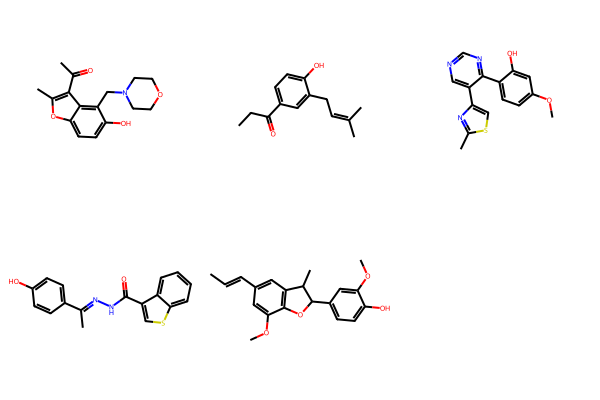

In [80]:
draw_molecules(0)

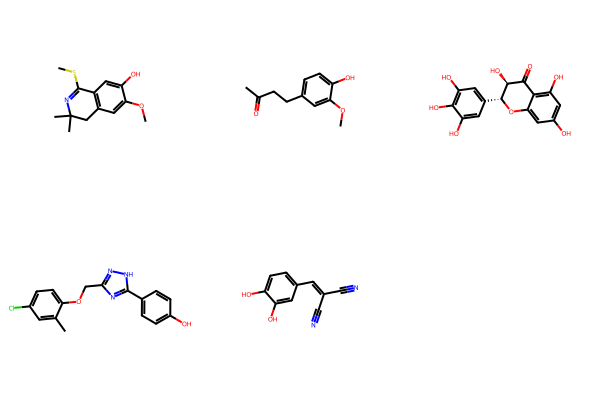

In [81]:
draw_molecules(1)

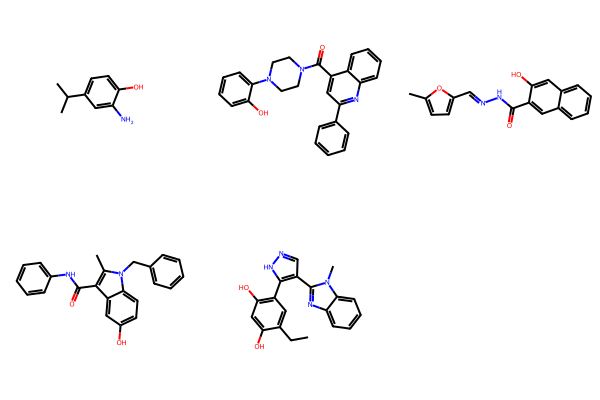

In [82]:
draw_molecules(27)